# This file is shamelessly taken from the book for the most part

This is taken from the Nolan/Duncan Data Science textbook. I did not write any of it personally

### first we download the data

In [1]:
source('setup.r')

[1] "destination file already exists"


### Load the data

In [2]:
DATA_FRAME_SOURCE = '../data/offline.final.trace.csv'
TEXT_FILE_SOURCE = '../data/offline.final.trace.txt'

In [3]:
txt = readLines(TEXT_FILE_SOURCE)

### Get basic info about data

In [4]:
# The number of comments
sum(substr(txt, 1, 1) == "#")

[1] 5312

In [5]:
# The "length" of the document
length(txt)

[1] 151392

In [6]:
strsplit(txt[4], ";")[[1]]

[1] "t=1139643118358"                    "id=00:02:2D:21:0F:33"              
 [3] "pos=0.0,0.0,0.0"                    "degree=0.0"                        
 [5] "00:14:bf:b1:97:8a=-38,2437000000,3" "00:14:bf:b1:97:90=-56,2427000000,3"
 [7] "00:0f:a3:39:e1:c0=-53,2462000000,3" "00:14:bf:b1:97:8d=-65,2442000000,3"
 [9] "00:14:bf:b1:97:81=-65,2422000000,3" "00:14:bf:3b:c7:c6=-66,2432000000,3"
[11] "00:0f:a3:39:dd:cd=-75,2412000000,3" "00:0f:a3:39:e0:4b=-78,2462000000,3"
[13] "00:0f:a3:39:e2:10=-87,2437000000,3" "02:64:fb:68:52:e6=-88,2447000000,1"
[15] "02:00:42:55:31:00=-84,2457000000,1"

In [7]:
unlist(lapply(strsplit(txt[4], ";")[[1]],
              function(x)
                sapply(strsplit(x, "=")[[1]], strsplit, ",")))

t       1139643118358                  id   00:02:2D:21:0F:33 
                "t"     "1139643118358"                "id" "00:02:2D:21:0F:33" 
                pos        0.0,0.0,0.01        0.0,0.0,0.02        0.0,0.0,0.03 
              "pos"               "0.0"               "0.0"               "0.0" 
             degree                 0.0   00:14:bf:b1:97:8a   -38,2437000000,31 
           "degree"               "0.0" "00:14:bf:b1:97:8a"               "-38" 
  -38,2437000000,32   -38,2437000000,33   00:14:bf:b1:97:90   -56,2427000000,31 
       "2437000000"                 "3" "00:14:bf:b1:97:90"               "-56" 
  -56,2427000000,32   -56,2427000000,33   00:0f:a3:39:e1:c0   -53,2462000000,31 
       "2427000000"                 "3" "00:0f:a3:39:e1:c0"               "-53" 
  -53,2462000000,32   -53,2462000000,33   00:14:bf:b1:97:8d   -65,2442000000,31 
       "2462000000"                 "3" "00:14:bf:b1:97:8d"               "-65" 
  -65,2442000000,32   -65,2442000000,33   00:14:bf:b1:97:81   -65,2422000000,31 
       "2442000000"                 "3" "00:14:bf:b1:97:81"               "-65" 
  -65,2422000000,32   -65,2422000000,33   00:14:bf:3b:c7:c6   -66,2432000000,31 
       "2422000000"                 "3" "00:14:bf:3b:c7:c6"               "-66" 
  -66,2432000000,32   -66,2432000000,33   00:0f:a3:39:dd:cd   -75,2412000000,31 
       "2432000000"                 "3" "00:0f:a3:39:dd:cd"               "-75" 
  -75,2412000000,32   -75,2412000000,33   00:0f:a3:39:e0:4b   -78,2462000000,31 
       "2412000000"                 "3" "00:0f:a3:39:e0:4b"               "-78" 
  -78,2462000000,32   -78,2462000000,33   00:0f:a3:39:e2:10   -87,2437000000,31 
       "2462000000"                 "3" "00:0f:a3:39:e2:10"               "-87" 
  -87,2437000000,32   -87,2437000000,33   02:64:fb:68:52:e6   -88,2447000000,11 
       "2437000000"                 "3" "02:64:fb:68:52:e6"               "-88" 
  -88,2447000000,12   -88,2447000000,13   02:00:42:55:31:00   -84,2457000000,11 
       "2447000000"                 "1" "02:00:42:55:31:00"               "-84" 
  -84,2457000000,12   -84,2457000000,13 
       "2457000000"                 "1"

In [8]:
tokens = strsplit(txt[4], "[;=,]")[[1]]

In [9]:
tokens

[1] "t"                 "1139643118358"     "id"               
 [4] "00:02:2D:21:0F:33" "pos"               "0.0"              
 [7] "0.0"               "0.0"               "degree"           
[10] "0.0"               "00:14:bf:b1:97:8a" "-38"              
[13] "2437000000"        "3"                 "00:14:bf:b1:97:90"
[16] "-56"               "2427000000"        "3"                
[19] "00:0f:a3:39:e1:c0" "-53"               "2462000000"       
[22] "3"                 "00:14:bf:b1:97:8d" "-65"              
[25] "2442000000"        "3"                 "00:14:bf:b1:97:81"
[28] "-65"               "2422000000"        "3"                
[31] "00:14:bf:3b:c7:c6" "-66"               "2432000000"       
[34] "3"                 "00:0f:a3:39:dd:cd" "-75"              
[37] "2412000000"        "3"                 "00:0f:a3:39:e0:4b"
[40] "-78"               "2462000000"        "3"                
[43] "00:0f:a3:39:e2:10" "-87"               "2437000000"       
[46] "3"                 "02:64:fb:68:52:e6" "-88"              
[49] "2447000000"        "1"                 "02:00:42:55:31:00"
[52] "-84"               "2457000000"        "1"

### Create a matrix for data (just first row)

In [10]:
tmp = matrix(tokens[ - (1:10) ], ncol = 4, byrow = TRUE)

In [11]:
mat = cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp),
                   ncol = 6, byrow = TRUE),
tmp)

In [12]:
dim(mat)

[1] 11 10

In [13]:
mat

1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8d,-65,2442000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:81,-65,2422000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:3b:c7:c6,-66,2432000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:dd:cd,-75,2412000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e0:4b,-78,2462000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e2:10,-87,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,02:64:fb:68:52:e6,-88,2447000000,1
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,02:00:42:55:31:00,-84,2457000000,1


### Create a matrix for all rows

In [14]:
processLine =
function(x)
{
  tokens = strsplit(x, "[;=,]")[[1]]
  tmp = matrix(tokens[ - (1:10) ], ncol = 4, byrow = TRUE)
  cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp),
ncol = 6, byrow = TRUE), tmp)
}

In [15]:
# TODO: Use all rows (not just 20th)
#tmp = lapply(txt[4:20], processLine)

lines = txt[ substr(txt, 1, 1) != "#" ]
tmp = lapply(lines, processLine)

Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
“data length exceeds size of matrix”Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
“data length exceeds size of matrix”Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
“data length exceeds size of matrix”Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
“data length exceeds size of matrix”Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
“data length exceeds size of matrix”Warning message in matrix(tokens[c(2, 4, 6:8, 10)], nrow = nrow(tmp), ncol = 6, :
“data length exceeds size of matrix”

In [16]:
offline = as.data.frame(do.call("rbind", tmp))
dim(offline)

[1] 1181628      10

### To fix the above error, let's not continue with processing if we do not have any tokens with a row

In [17]:
processLine = function(x)
{
    tokens = strsplit(x, "[;=,]")[[1]]
    if (length(tokens) == 10)
      return(NULL)
    tmp = matrix(tokens[ - (1:10) ], , 4, byrow = TRUE)
    cbind(matrix(tokens[c(2, 4, 6:8, 10)], nrow(tmp), 6,
    byrow = TRUE), tmp)
}

In [18]:
tmp = lapply(lines, processLine)

### Create a data frame

In [19]:
offline = as.data.frame(do.call("rbind", tmp),
                        stringsAsFactors = FALSE)


In [20]:
# Over one million rows
dim(offline)

[1] 1181628      10

In [21]:
class(offline)

[1] "data.frame"

In [22]:
head(offline)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8d,-65,2442000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:81,-65,2422000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:3b:c7:c6,-66,2432000000,3


### Clean

In [23]:
# Reanme
names(offline) = c("time", "scanMac", "posX", "posY", "posZ",
                   "orientation", "mac", "signal",
                   "channel", "type")

In [24]:
# Cool trick to make some things numeric
numVars = c("time", "posX", "posY", "posZ",
            "orientation", "signal")
offline[ numVars ] =  lapply(offline[ numVars ], as.numeric)

In [25]:
head(offline)

time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,type
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:90,-56,2427000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:81,-65,2422000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,3


In [26]:
# Remove things that are not type=3 and then remove type
offline = offline[ offline$type == "3", ]
offline = offline[ , "type" != names(offline) ]
dim(offline)

[1] 978443      9

In [27]:
# We want time in seconds (make a backup using new rawTime var)
offline$rawTime = offline$time
offline$time = offline$time/1000
class(offline$time) = c("POSIXt", "POSIXct")

In [28]:
head(offline)

time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,rawTime
2006-02-11 01:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,1.139643e+12
2006-02-11 01:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:90,-56,2427000000,1.139643e+12
2006-02-11 01:31:58,00:02:2D:21:0F:33,0,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,1.139643e+12
2006-02-11 01:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,1.139643e+12
2006-02-11 01:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:81,-65,2422000000,1.139643e+12
2006-02-11 01:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,1.139643e+12


In [29]:
unlist(lapply(offline, class))

time1       time2     scanMac        posX        posY        posZ 
   "POSIXt"   "POSIXct" "character"   "numeric"   "numeric"   "numeric" 
orientation         mac      signal     channel     rawTime 
  "numeric" "character"   "numeric" "character"   "numeric"

In [30]:
summary(offline[, numVars])

      time                          posX            posY             posZ  
 Min.   :2006-02-11 01:31:58   Min.   : 0.00   Min.   : 0.000   Min.   :0  
 1st Qu.:2006-02-11 07:21:27   1st Qu.: 2.00   1st Qu.: 3.000   1st Qu.:0  
 Median :2006-02-11 13:57:58   Median :12.00   Median : 6.000   Median :0  
 Mean   :2006-02-16 08:57:37   Mean   :13.52   Mean   : 5.897   Mean   :0  
 3rd Qu.:2006-02-19 08:52:40   3rd Qu.:23.00   3rd Qu.: 8.000   3rd Qu.:0  
 Max.   :2006-03-09 14:41:10   Max.   :33.00   Max.   :13.000   Max.   :0  
  orientation        signal     
 Min.   :  0.0   Min.   :-99.0  
 1st Qu.: 90.0   1st Qu.:-69.0  
 Median :180.0   Median :-60.0  
 Mean   :167.2   Mean   :-61.7  
 3rd Qu.:270.0   3rd Qu.:-53.0  
 Max.   :359.9   Max.   :-25.0  

In [31]:
# Take a look at some of these values
 summary(sapply(offline[ , c("mac", "channel", "scanMac")],
                as.factor))

                mac               channel                    scanMac      
 00:0f:a3:39:e1:c0:145862   2462000000:189774   00:02:2D:21:0F:33:978443  
 00:0f:a3:39:dd:cd:145619   2437000000:152124                             
 00:14:bf:b1:97:8a:132962   2412000000:145619                             
 00:14:bf:3b:c7:c6:126529   2432000000:126529                             
 00:14:bf:b1:97:90:122315   2427000000:122315                             
 00:14:bf:b1:97:8d:121325   2442000000:121325                             
 (Other)          :183831   (Other)   :120757                             

In [32]:
# From the above summary, we can remove `scanMac` and `posZ`
offline = offline[ , !(names(offline) %in% c("scanMac", "posZ"))]

### Exploring Orientation

In [33]:
# We only expect 8 different orientations, but there appears to be actualy 203
length(unique(offline$orientation))

[1] 203

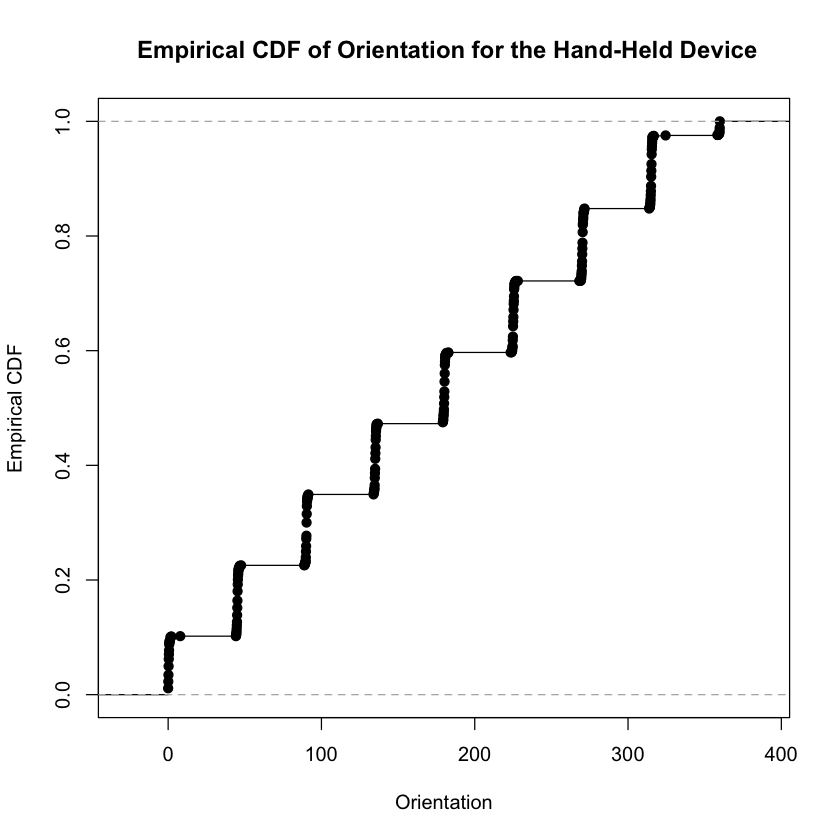

In [36]:
# Why aren't there just 8 orientations? What does the distribution actually look like?
# From the following, we can tell that we are using both 0 and 360 degrees (these should be combined)
# Also, there seems to be too much precision here, meaning it seems that we have a bunch of values like 0.12 (which should be just 0)

plot(ecdf(offline$orientation),main=" Empirical CDF of Orientation for the Hand-Held Device",
        xlab="Orientation", ylab="Empirical CDF")

In [37]:
# Let's round the numbers down for better factoral variables
roundOrientation = function(angles) {
  refs = seq(0, by = 45, length  = 9)
  q = sapply(angles, function(o) which.min(abs(o - refs)))
  c(refs[1:8], 0)[q]
}
             
offline$angle = roundOrientation(offline$orientation)

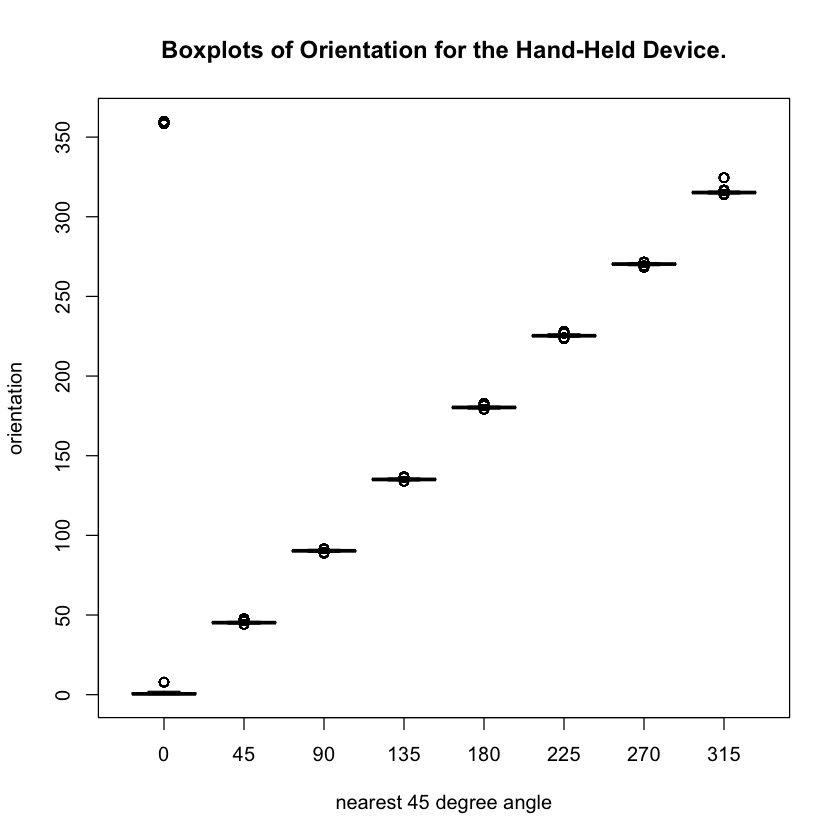

In [39]:
# Make sure that the rounding worked

with(offline, boxplot(orientation ~ angle, main = "Boxplots of Orientation for the Hand-Held Device.",
                      xlab = "nearest 45 degree angle",
                      ylab="orientation"))

In [40]:
# Check out number of unique mac address and channels
c(length(unique(offline$mac)), length(unique(offline$channel)))

[1] 12  8

In [41]:
# Get a count at how many times each MAC shows up
table(offline$mac)


00:04:0e:5c:23:fc 00:0f:a3:39:dd:cd 00:0f:a3:39:e0:4b 00:0f:a3:39:e1:c0 
              418            145619             43508            145862 
00:0f:a3:39:e2:10 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 00:14:bf:b1:97:8a 
            19162            126529            120339            132962 
00:14:bf:b1:97:8d 00:14:bf:b1:97:90 00:30:bd:f8:7f:c5 00:e0:63:82:8b:a9 
           121325            122315               301               103 

In [42]:
# There is some oddities with some of the access points - let's just take the top 7
subMacs = names(sort(table(offline$mac), decreasing = TRUE))[1:7]
offline = offline[ offline$mac %in% subMacs, ]

In [43]:
# New count of how many times each MAC shows up
table(offline$mac)


00:0f:a3:39:dd:cd 00:0f:a3:39:e1:c0 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 
           145619            145862            126529            120339 
00:14:bf:b1:97:8a 00:14:bf:b1:97:8d 00:14:bf:b1:97:90 
           132962            121325            122315 

In [44]:
# Look at combination of mac/channel
macChannel = with(offline, table(mac, channel))
macChannel

                   channel
mac                 2412000000 2422000000 2427000000 2432000000 2437000000
  00:0f:a3:39:dd:cd     145619          0          0          0          0
  00:0f:a3:39:e1:c0          0          0          0          0          0
  00:14:bf:3b:c7:c6          0          0          0     126529          0
  00:14:bf:b1:97:81          0     120339          0          0          0
  00:14:bf:b1:97:8a          0          0          0          0     132962
  00:14:bf:b1:97:8d          0          0          0          0          0
  00:14:bf:b1:97:90          0          0     122315          0          0
                   channel
mac                 2442000000 2462000000
  00:0f:a3:39:dd:cd          0          0
  00:0f:a3:39:e1:c0          0     145862
  00:14:bf:3b:c7:c6          0          0
  00:14:bf:b1:97:81          0          0
  00:14:bf:b1:97:8a          0          0
  00:14:bf:b1:97:8d     121325          0
  00:14:bf:b1:97:90          0          0

In [45]:
# Let's make sure that each Mac shows up at least once in a channel
apply(macChannel, 1, function(x) sum(x > 0))

00:0f:a3:39:dd:cd 00:0f:a3:39:e1:c0 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 
                1                 1                 1                 1 
00:14:bf:b1:97:8a 00:14:bf:b1:97:8d 00:14:bf:b1:97:90 
                1                 1                 1

In [46]:
# We do not need "channel" anymore because there is at least one mac per channel?
offline = offline[ , "channel" != names(offline)]

### Take a look at location combinations
count how many unique combinations of locX/locY we have

In [47]:
locDF = with(offline,
             by(offline, list(posX, posY), function(x) x))
length(locDF)

[1] 476

In [48]:
# Check how many are empty (null)
sum(sapply(locDF, is.null))

[1] 310

In [49]:
# Drop null values
locDF = locDF[ !sapply(locDF, is.null) ]

In [52]:
length(locDF)

[1] 166

In [53]:
# If we want position with the location
locCounts = sapply(locDF,
                   function(df)
                     c(df[1, c("posX", "posY")], count = nrow(df)))

In [54]:
class(locCounts)

[1] "matrix"

In [55]:
dim(locCounts)

[1]   3 166

In [56]:
head(locCounts)

posX,0,1,2,0,1,2,0,1,2,0,⋯,2,0,1,2,0,1,2,0,1,2
posY,0,0,0,1,1,1,2,2,2,3,⋯,10,11,11,11,12,12,12,13,13,13
count,5505,5505,5506,5524,5543,5558,5503,5564,5513,5529,⋯,5557,5488,5523,5656,5524,5544,5734,5523,5553,5774


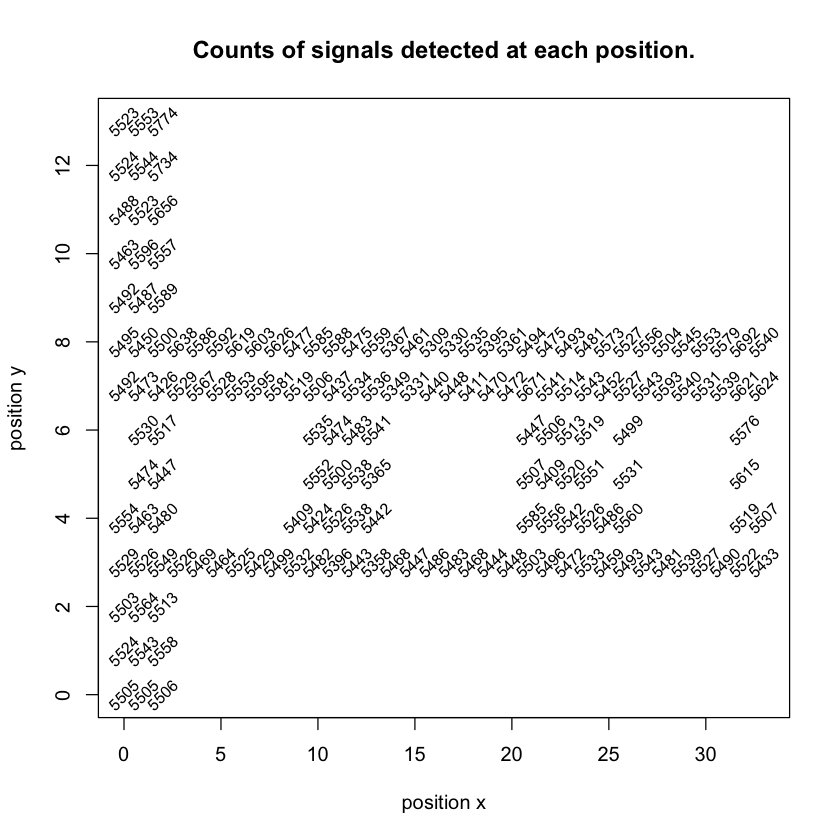

In [60]:
# Visualize the locations with tgeir counts
locCounts = t(locCounts)
plot(locCounts, main = "Counts of signals detected at each position.", type = "n", xlab = "position x", ylab = "position y",)
text(locCounts, labels = locCounts[,3], cex = .8, srt = 45)

# Write to a csv

In [53]:
write.csv(offline, DATA_FRAME_SOURCE)

In [58]:
sprintf('Wrote to %s', c(DATA_FRAME_SOURCE))

[1] "Wrote to ../data/offline.final.trace.csv"

In [59]:
head(offline)

time,posX,posY,orientation,mac,signal,rawTime,angle
2006-02-11 01:31:58,0,0,0,00:14:bf:b1:97:8a,-38,1.139643e+12,0
2006-02-11 01:31:58,0,0,0,00:14:bf:b1:97:90,-56,1.139643e+12,0
2006-02-11 01:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,1.139643e+12,0
2006-02-11 01:31:58,0,0,0,00:14:bf:b1:97:8d,-65,1.139643e+12,0
2006-02-11 01:31:58,0,0,0,00:14:bf:b1:97:81,-65,1.139643e+12,0
2006-02-11 01:31:58,0,0,0,00:14:bf:3b:c7:c6,-66,1.139643e+12,0
